In [ ]:
!pip install pca

In [ ]:
# 7_教師なし学習
# 13.1 主成分分析
import numpy as np
import pandas as pd
from pca import pca
from scipy.stats import zscore

my_data = pd.DataFrame(
    {'language': [  0,  20,  20,  25,  22,  17],
     'english':  [  0,  20,  40,  20,  24,  18],
     'math':     [100,  20,   5,  30,  17,  25],
     'science':  [  0,  20,   5,  25,  16,  23],
     'society':  [  0,  20,  30,   0,  21,  17]},
    index=       ['A', 'B', 'C', 'D', 'E', 'F'])

my_model = pca(n_components=5)
my_result = my_model.fit_transform(my_data) # 主成分分析の実行

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
my_result['PC'] # 主成分スコア


,PC1,PC2,PC3,PC4,PC5
A,74.907282,7.010808,0.361499,0.076343,-2.855324e-15
B,-13.818842,-2.753459,-5.273039,0.841842,2.251702e-15
C,-33.714034,18.417290,4.876294,-0.882042,-1.189989e-15
D,-1.730630,-17.876372,7.925076,-0.149317,-1.907888e-16
E,-17.837474,1.064998,-1.652676,2.312541,3.195391e-15
F,-7.806303,-5.863266,-6.237154,-2.199367,3.088116e-16


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (88.8% expl.var)', ylabel='PC2 (9.11% expl.var)'>)

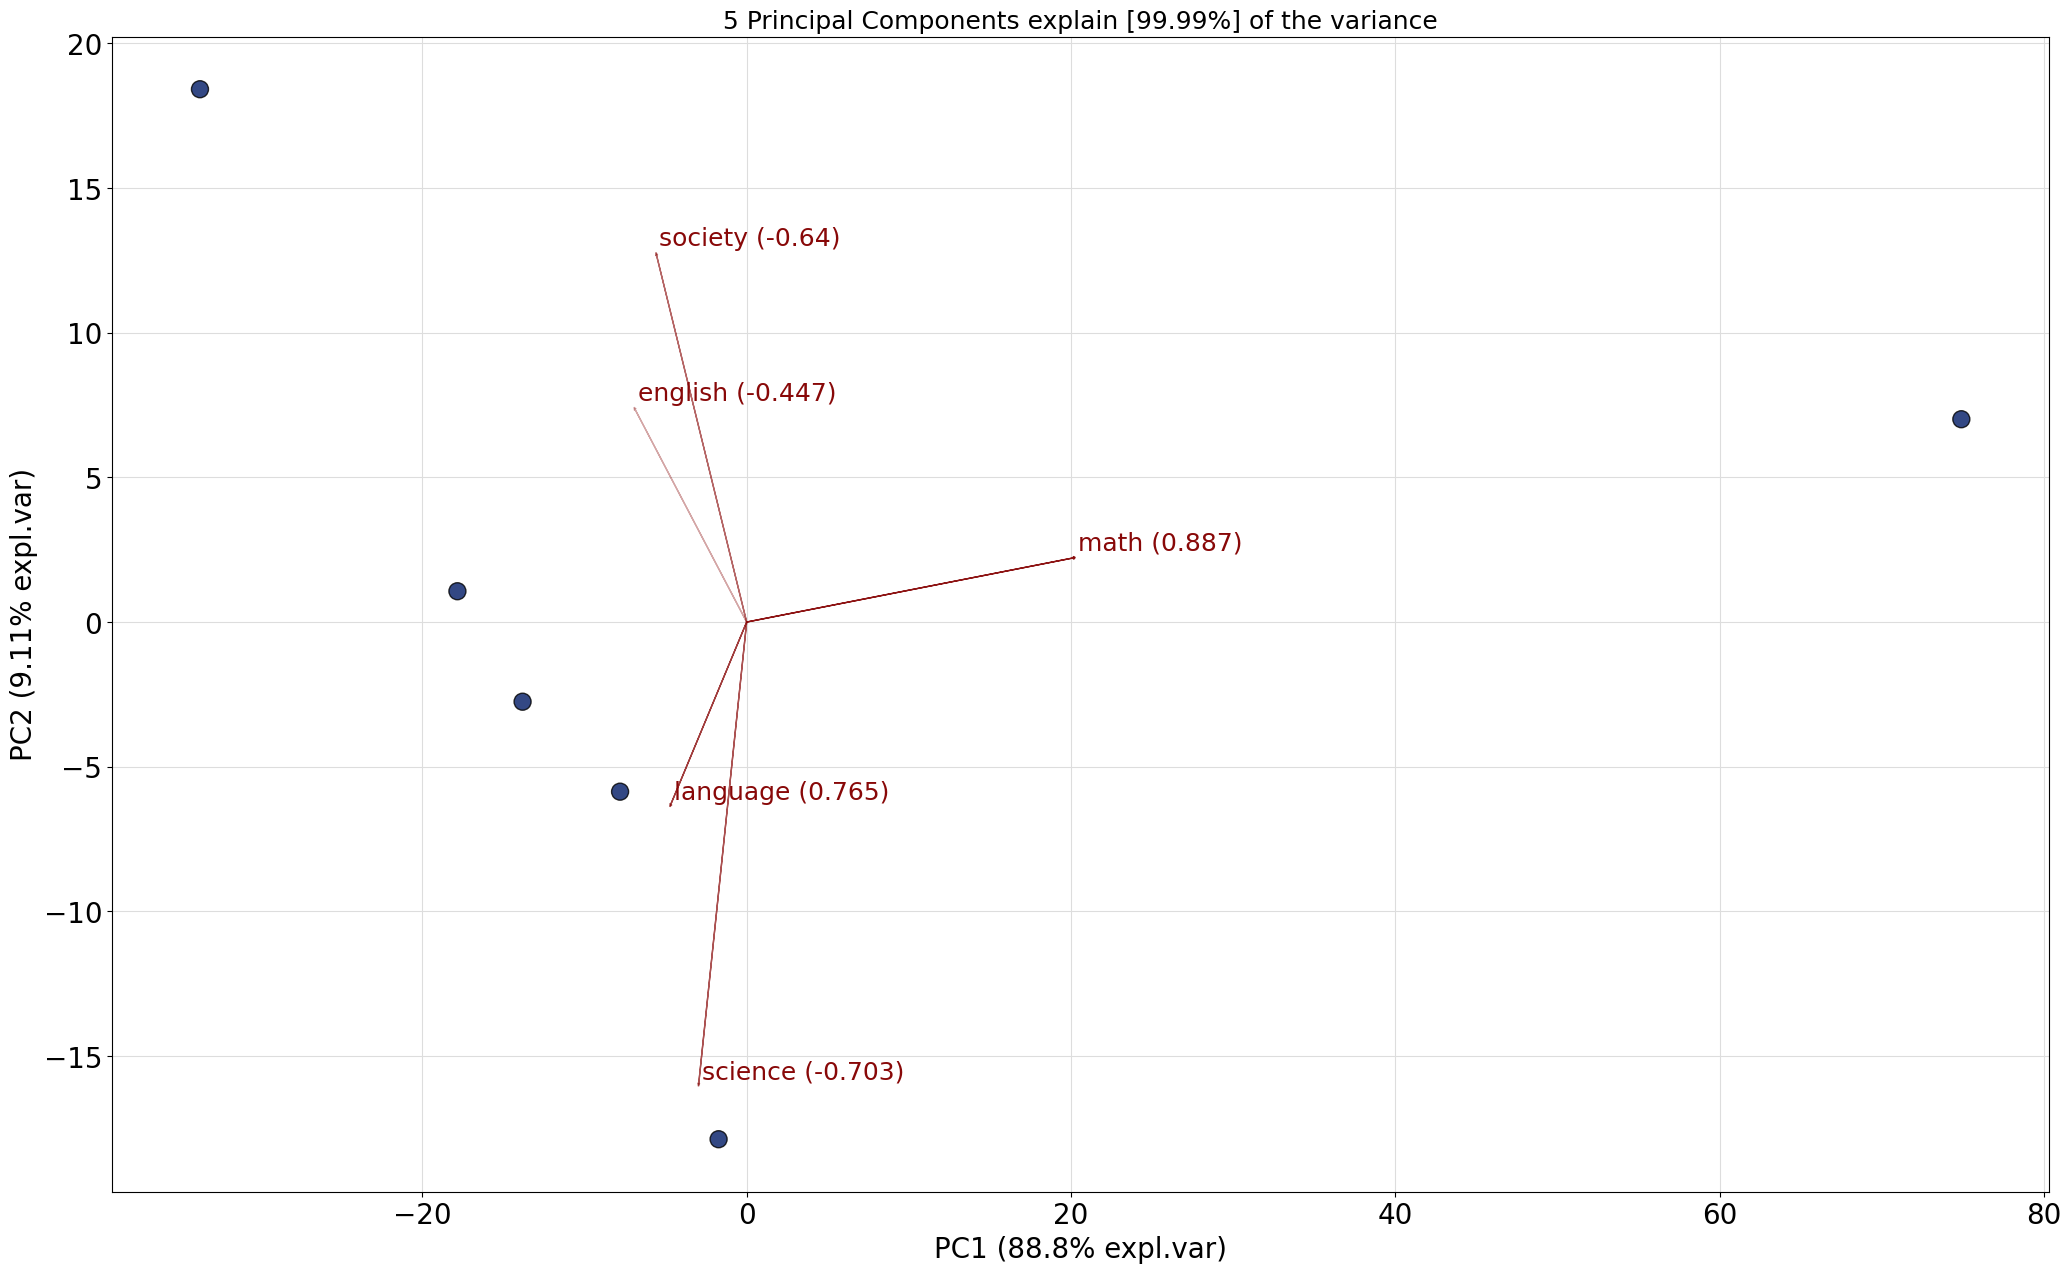

In [ ]:
my_model.biplot(legend=False)

In [ ]:
my_result['loadings']


,language,english,math,science,society
PC1,-0.207498,-0.304360,0.887261,-0.130198,-0.245204
PC2,-0.279463,0.325052,0.097643,-0.702667,0.559435
PC3,0.306117,0.615799,0.056345,-0.338446,-0.639815
PC4,0.764943,-0.471697,-0.007655,-0.418045,0.132455
PC5,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214


In [ ]:
my_result['explained_var']


array([0.88848331, 0.97962854, 0.99858005, 1.        , 1.        ])

In [ ]:
tmp = zscore(my_data, ddof=1) # 標準化
my_result = my_model.fit_transform(tmp)
my_result['PC']

[pca] >Cleaning previous fitted model results..
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC1,PC2,PC3,PC4,PC5
A,3.673722,0.568850,0.058449,0.010636,3.966865e-16
B,-0.652879,-0.246926,-0.434798,0.093045,-1.152979e-17
C,-1.568294,1.742598,0.380571,-0.097734,-1.629400e-16
D,-0.250504,-1.640039,0.675366,-0.031991,8.108395e-18
E,-0.886186,0.110493,-0.092540,0.230379,1.559282e-16
F,-0.315858,-0.534976,-0.587048,-0.204335,-2.517267e-16


In [ ]:
tmp = my_data - my_data.mean()
Z = np.matrix(tmp) # 標準化しない場合
#Z = np.matrix(tmp / my_data.std(ddof=1)) # √不偏分散で標準化する場合
#Z = np.matrix(tmp / my_data.std(ddof=0)) # pca(normalize=True)に合わせる場合

n = len(my_data)
S = np.cov(Z, rowvar=0, ddof=0) # 分散共分散行列
#S = Z.T @ Z / n # (同じ結果)
vals, vacs = np.linalg.eig(S) # 固有値と固有ベクトル
Z @ vacs # 主成分スコア
vals.cumsum() / vals.sum() # 累積寄与率

array([0.88848331, 0.97962854, 0.99858005, 1.        , 1.        ])

In [ ]:
# 得意値分解
U, d, V = np.linalg.svd(Z, full_matrices=False)
W = np.diag(d)

[np.isclose(Z, U @ W @ V).all(),                     # 確認1
 np.isclose(U.T @ U, np.identity(U.shape[1])).all(), # 確認2
 np.isclose(V @ V.T, np.identity(V.shape[0])).all()] # 確認3

[True, True, True]

In [ ]:
U @ W # 主成分スコア

e = d ** 2 / n # 分散共分散行列の固有値
e.cumsum() / e.sum() # 累積寄与率

array([0.88848331, 0.97962854, 0.99858005, 1.        , 1.        ])

In [3]:
# 13.2 クラスタ分析
import pandas as pd
from scipy.cluster import hierarchy

my_data = pd.DataFrame(
    {'x': [  0, -16,  10,  10],
     'y': [  0,   0,  10, -15]},
    index=['A', 'B', 'C', 'D'])

my_result = hierarchy.linkage(
    my_data,
    metric='euclidean', # 省略可
    method='complete'
)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 14.142135623730951, 14.142135623730951, 0.0],
  [0.0, 25.0, 25.0, 14.142135623730951],
  [0.0, 30.01666203960727, 30.01666203960727, 25.0]],
 'ivl': ['B', 'D', 'A', 'C'],
 'leaves': [1, 3, 0, 2],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

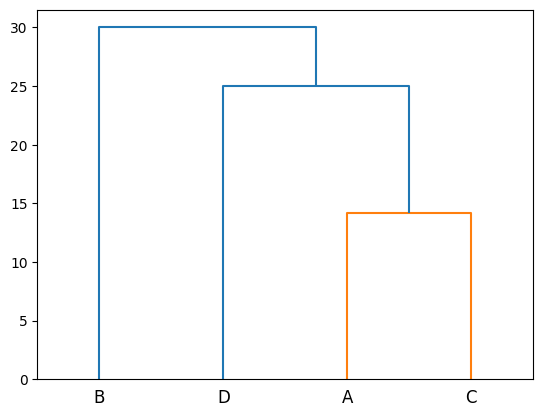

In [4]:
hierarchy.dendrogram(
    my_result,
    labels=my_data.index
)

In [5]:
hierarchy.cut_tree(my_result, 3)

array([[0],
       [1],
       [0],
       [2]])

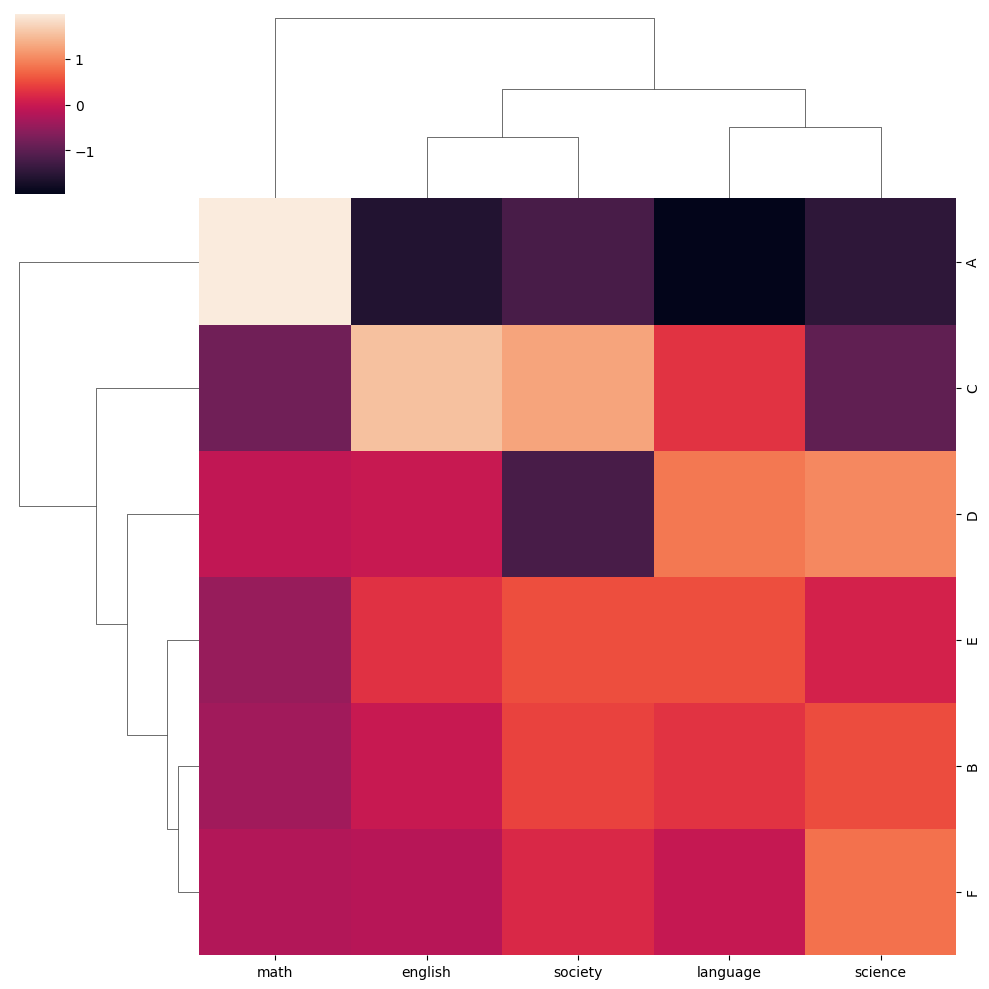

In [6]:
# 13.2.2 階層的クラスタ分析とヒートマップ
import pandas as pd
import seaborn as sns

my_data = pd.DataFrame(
    {'language': [  0,  20,  20,  25,  22,  17],
     'english':  [  0,  20,  40,  20,  24,  18],
     'math':     [100,  20,   5,  30,  17,  25],
     'science':  [  0,  20,   5,  25,  16,  23],
     'society':  [  0,  20,  30,   0,  21,  17]},
    index=       ['A', 'B', 'C', 'D', 'E', 'F'])

sns.clustermap(my_data, z_score=1) # 列ごとの標準化

In [8]:
# 13.2.3 非階層的クラスタ分析
import pandas as pd
from sklearn.cluster import KMeans

my_data = pd.DataFrame(
    {'x': [  0, -16,  10,  10],
     'y': [  0,   0,  10, -15]},
    index=['A', 'B', 'C', 'D'])

my_result = KMeans(
    n_clusters=3).fit(my_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
my_result.labels_

array([1, 2, 1, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='k'>

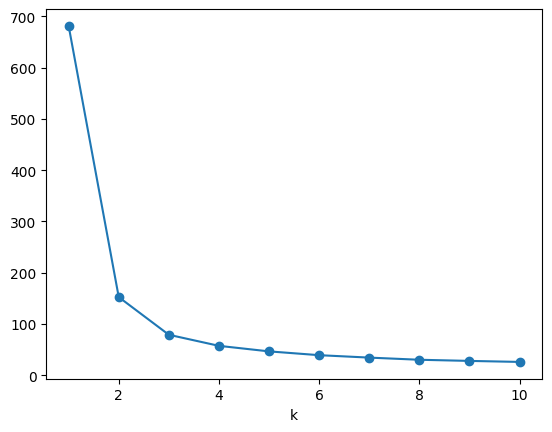

In [12]:
# 13.2.4 クラスタ数の決定
import pandas as pd
import statsmodels.api as sm
from sklearn.cluster import KMeans

iris = sm.datasets.get_rdataset('iris', 'datasets').data
my_data = iris.iloc[:, 0:4]

k = range(1, 11)
my_df = pd.DataFrame({
    'k': k,
    'inertia': [KMeans(k).fit(my_data).inertia_ for k in range(1, 11)]
})
my_df.plot(x='k', style='o-', legend=False)

In [15]:
!pip install pca

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

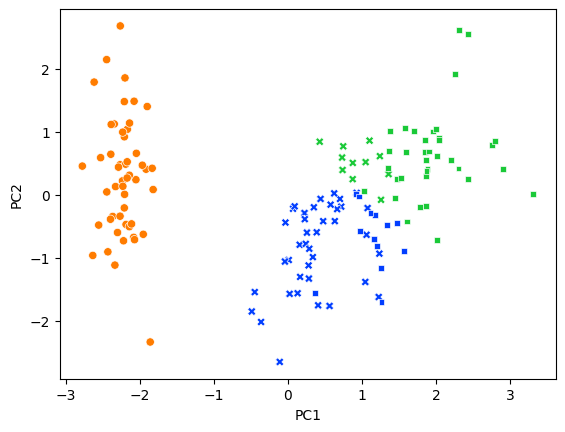

In [18]:
# 13.2.5 主成分分析とクラスタ分析
import seaborn as sns
import statsmodels.api as sm
from pca import pca
from scipy.cluster import hierarchy
from scipy.stats import zscore
from sklearn.cluster import KMeans

iris = sm.datasets.get_rdataset('iris', 'datasets').data
my_data = zscore(iris.iloc[:, 0:4])

my_model = pca() # 主成分分析
my_result = my_model.fit_transform(my_data)['PC']
my_result['Species'] = list(iris.Species)

# 非階層的クラスタ分析の場合
my_result['cluster'] = KMeans(n_clusters=3).fit(my_data).labels_

# 階層的クラスタ分析の場合
#my_result['cluster'] = hierarchy.cut_tree(
#    hierarchy.linkage(my_data, method='complete'), 3
#)[:, 0]

sns.scatterplot(
    x='PC1',
    y='PC2',
    data=my_result,
    legend=False,
    hue='cluster',    # 色でクラスタを表現する
    style='Species',  # 形で品種を表現する
    palette='bright'
)